In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
import random

# Probability Distributions

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs).

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this notebook we'll look at some common probability distributions and how to work with them in Python.

### The uniform distribution

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                scale=10)     # To 10

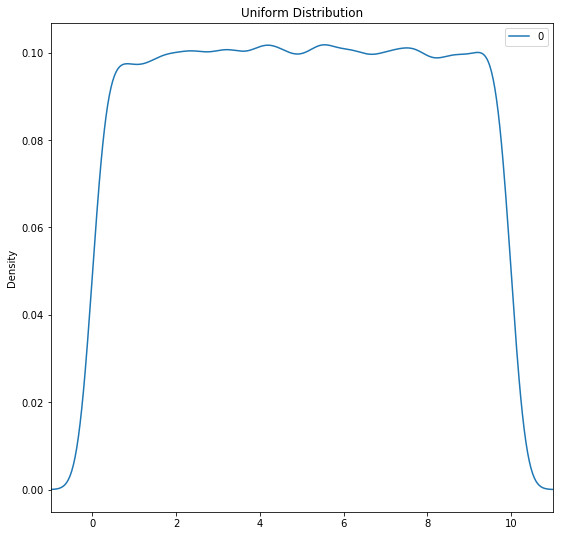

In [5]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11),
                               title='Uniform Distribution')

For the Uniform distibution the area under a probability density curve is always equal to 1.

With Stats in Python, cdf() gives the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [73]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [50]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

pdf() gives the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [9]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10))

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


### The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

In [12]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.158655253931 0.158655253931 0.682689492137


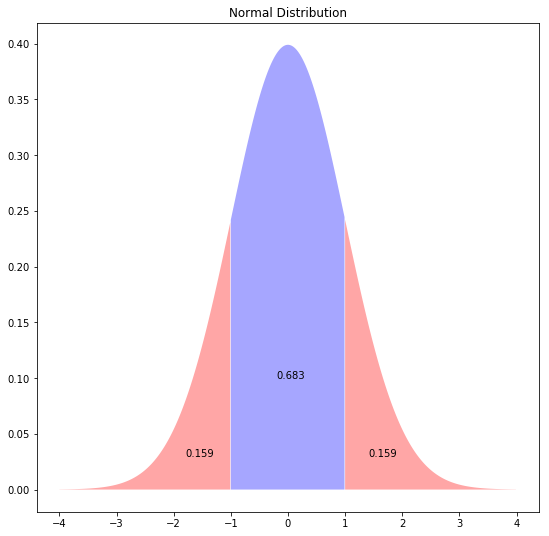

In [14]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))
plt.title('Normal Distribution')

Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [15]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.95996398454
1.95996398454


### The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials.

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts  12  75  440  1151  2075  2478  2078  1144  431  101  15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BECC160>]], dtype=object)

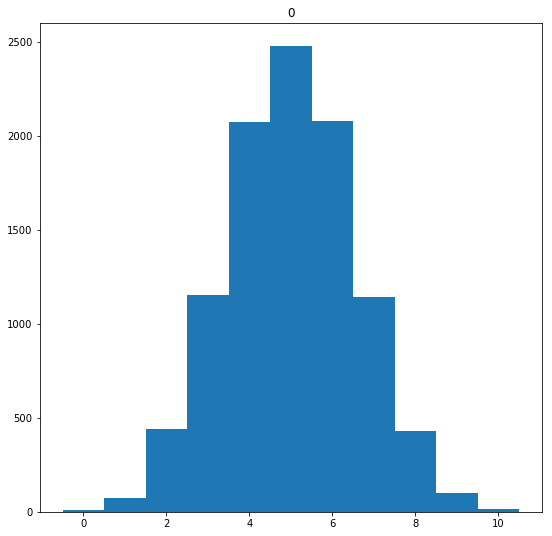

In [19]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11, grid=False)

When the probability of success is 0.5 the distribution is similar to the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   4  57  256  867  1928  3047  2745  1096


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3FEDD8>]], dtype=object)

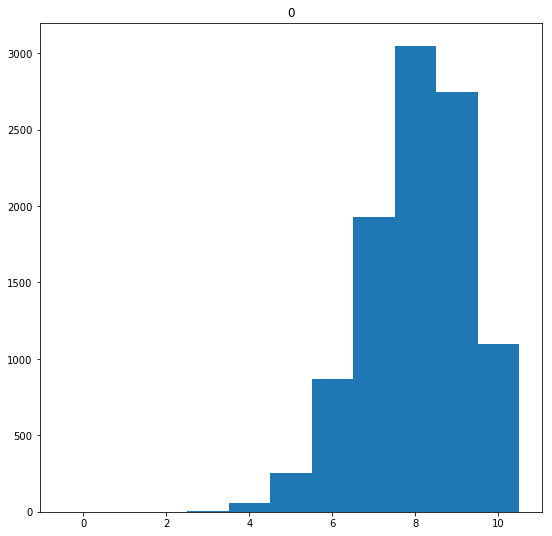

In [22]:

biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11, grid=False)

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [23]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [24]:
1-stats.binom.cdf(k=5,      # Probability of k = 6 successes of more
                  n=10,     # with 10 flips  
                  p=0.8)    # And success probability 0.8

0.96720650240000006

For discreet values, we use the Probability mass function 

In [25]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [26]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999998

### The Geometric and Exponential Distributions


The geometric and exponential distributions model the time it takes for an event to occur. 
- **The geometric distribution:** is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. 
- **The exponential distribution:** is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  15
row_0                                                                  
counts  4972  2447  1250  698  306  163  93  39  14   8   3   2   4   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC095F8>]], dtype=object)

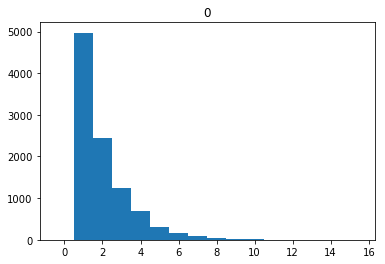

In [45]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1, grid=False)

In [37]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [38]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

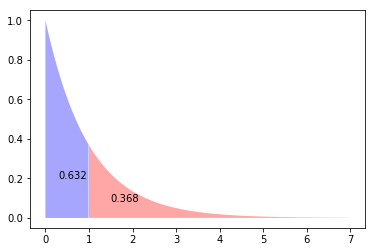

In [40]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

In [39]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

### The poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3666  3681  1838  631  146  29  6  3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB94438>]], dtype=object)

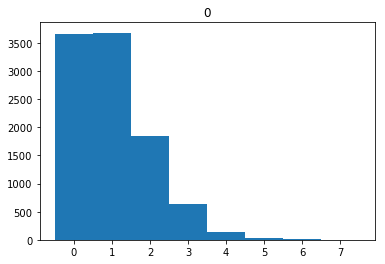

In [43]:

random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1, grid=False)

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   1   2   3    4    5    6    7     8     9     10 ...   14   15   16  \
row_0                                                    ...                  
counts   2  15  86  193  396  626  948  1110  1239  1199 ...  529  354  226   

col_0    17  18  19  20  21  22  23  
row_0                                
counts  128  63  40  18   6   3   4  

[1 rows x 23 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBCCB00>]], dtype=object)

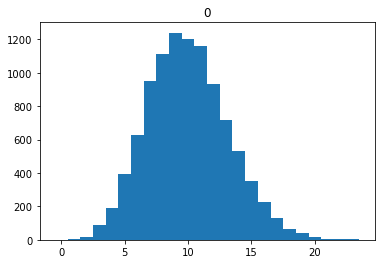

In [44]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1, grid=False)

In [46]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.067085962879031888

In [48]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.